# 9. Deep Learning Tutorial for Beginners

### Introduction 

* Deep learning : ML technique that learns features directly from data
* as amount of data increases, deep learning givefs better performance
* Features are given manually in ML
* Learns the feature in DL (ML covers DL)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Overview the Data Set 
* use 'sign language digits data set'
* 2062 sign images
* 10 unique signs (0 to 9)
* X is image array
* Y is label array( 0 and 1 ) 

(-0.5, 63.5, 63.5, -0.5)

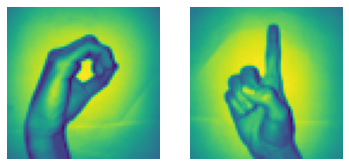

In [2]:
x_1 = np.load('./input/X.npy')
y_1 = np.load('./input/Y.npy')
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size)) #image of sign 0
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size)) #image of sign 1
plt.axis('off')


In [3]:
# Join a sequence of arrays along an row axis 
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis = 0) # each is 0 sign and 1 sign
z = np.zeros(205) # zero labels
o = np.ones(205) # one labels
Y = np.concatenate((z,o), axis = 0).reshape(X.shape[0], 1)
print('X shape: ', X.shape) #(410, 64, 64) = 410 images with the size 64 * 64 pixels
print('Y shape: ', Y.shape) # (410 ,10) = 410 labels 

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
# split X and Y into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
# Flatten X array to 2D 
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])
print(X_train_flatten.shape) # 348 images with 4096 pixels 
print(X_test_flatten.shape) # 62 images with 4096 pixels 

(348, 4096)
(62, 4096)


In [6]:
x_train = X_train_flatten.T #Transpose the array
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


### Computation Graph 

* parameters : bias and weights 
 $$z = {w.T}\cdot x + b         
    = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b$$
* y_head = sigmoid(z)
* sigmoid function gives probability 


### Initializing Parameters
* Each pixels have own weights
* multiply each pixel values with their own weights 
* Initial value of weights -> use 0.01 in the tutorial 
* Shape of weights : (4096,1)

In [7]:
def init_weight_bias(dimension):
    w = np.full((dimension,1), 0.01) #np.full(shape, fill_value)
    b = 0.0
    return w, b

### Forward Propagation 
- z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
- Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. - Also equation of sigmoid function is in computation graph.
- Then we calculate loss(error) function.
- Cost function is summation of all loss(error).

In [8]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head
sigmoid(0)

0.5

* log loss(error) function : 
$$-(1-y)log(1-\hat y) - ylog{\hat y}$$

* cost function is the summation of loss function 
    - each image creates loss function 


In [9]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T, x) + b
    y_head = sigmoid(z) ## sigmoid returns value from 0 to 1
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head) #array of each loss function
    cost = (np.sum(loss)) / x_train.shape[1] # cost func. == sum(loss_functions) # divide into size for scaling
    return cost

### Optimization Algorithm with Gradient Descent

* Try to decrease the cost
* Update weights and bias
* use slope of function (derivative) to reach minimum point
$$w := w - \alpha{{\partial J(w,b)} \over {\partial(w,b)}}$$
* where alpha is a learning rate 
* learning rate is hyperparameter, shoud be chosen wisely
    - too low : local minimum
    - too high : overshooting
$${\partial J \over \partial w }= {1 \over m} x (y_{head} - y )^T$$
* hello
$${\partial J \over \partial b } = {1 \over m} \sum_{i=1}^m ( y_{head} - y)^T$$

In [10]:
def forward_backward_propagation(w,b,x_train, y_train):
    #forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    #backward propagation
    derivative_weight = (np.dot(x_train, (y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train).T / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [11]:
#updating parameters

def update(w,b,x_train, y_train, lr, epoch): 
    cost_list = []
    cost_list2 = [] 
    index = [] 
    for i in range(epoch): 
        cost, gradients = forward_backward_propagation(w,b,x_train, y_train)
        cost_list.append(cost)
        w = w - lr * gradients["derivative_weight"]
        b = b - lr * gradients["derivative_bias"]
        if i % 10 == 0 : 
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i : %f" %(i, cost))
    parameters = {"weight": w, "bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [12]:
def predict(w,b,x_test): 
    z = sigmoid(np.dot(w.T, x_test)) + b
    y_predict = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]): 
        if z[0,i]  <= 0.5 : 
            y_predict[0,i] = 0
        else :
            y_predict[0,i] = 1 
    return y_predict

Cost after iteration 0 : 14.014222
Cost after iteration 10 : 2.544689
Cost after iteration 20 : 2.577950
Cost after iteration 30 : 2.397999
Cost after iteration 40 : 2.185019
Cost after iteration 50 : 1.968348
Cost after iteration 60 : 1.754195
Cost after iteration 70 : 1.535079
Cost after iteration 80 : 1.297567
Cost after iteration 90 : 1.031919
Cost after iteration 100 : 0.737019
Cost after iteration 110 : 0.441355
Cost after iteration 120 : 0.252278
Cost after iteration 130 : 0.205168
Cost after iteration 140 : 0.196168


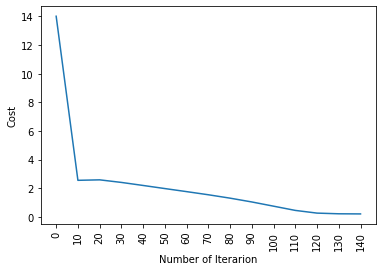

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [13]:
#put them all together 

def logistic_regression(x_train, y_train, x_test, y_test, lr, epoch): 
    dimension = x_train.shape[0] # 4096
    w, b = init_weight_bias(dimension)
    param, grad, cost_list = update(w,b, x_train, y_train, lr, epoch) 
    y_predict_test = predict(param['weight'], param['bias'], x_test)
    y_predict_train = predict(param['weight'], param['bias'], x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_predict_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test, lr = 0.01, epoch = 150)

## Logistic Regression with Sklearn
* logistic regression metohd that ease implementing logistic regression 


In [14]:
from sklearn import linear_model 
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


# Artificial Neural Network (ANN) 
* deep neural network or deep learning
* taking logistic regression and repeating it more than 2 times 
* "Deep" = how many hidden layers?
* use tanh(x) instead of sigmoid(z) 
* input -> hidden -> output

## 2-Layer Neural Network
* Initialize weights randomly
* Bias can be zero initially

In [15]:
#init param and layer_sizs 
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    param = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}  #randn : extract sample from std. normal distribution
    return param

#forward propagation
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    
    return A2, cache

### Loss and Cost Function

* Loss funtion and cost functions are the same 

$$J(\theta) = -\sum_i{y_i ln(\hat y_i)}$$

* Cross entropy function

In [16]:
# Compute Cost
def compute_cost_NN(A2, Y, param ): # A2 is computed by activation function, which is y_hat
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# Backward Propagation
def backward_propagation_NN(param, cache, X, Y):
    dZ2 = cache["A2"] - Y  # y_difference
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(param["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True ) / X.shape[1]
    grads = {"dweight1": dW1,
         "dbias1": db1,
         "dweight2": dW2,
         "dbias2": db2}
    return grads

    

### Update Parameters

In [17]:
#update parameters

def update_parameters_NN(param, grads, lr = 0.01) : 
    param = {"weight1" : param["weight1"] - lr * grads["dweight1"],
             "bias1" : param["bias1"] - lr* grads["dbias1"],
             "weight2" : param["weight2"]- lr * grads["dweight2"],
             "bias2":  param["bias2"] - lr* grads["dbias2"]}
    return param

### Prediction with learnt param weight and bias

In [18]:
# prediction
def predict_NN(param, x_test):
    A2, cache = forward_propagation_NN(x_test, param)
    Y_pred = np.zeros(1, x_test.shape[1])
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5: 
            Y_pred[0,i] = 0 
        else :
            Y_pred[0,i] = 1
            
    return Y_pred

### Create Model

Cost after iteration 0: 0.467332
Cost after iteration 100: 0.391575
Cost after iteration 200: 0.360178
Cost after iteration 300: 0.338043
Cost after iteration 400: 0.303026
Cost after iteration 500: 0.262151
Cost after iteration 600: 0.225266
Cost after iteration 700: 0.194068
Cost after iteration 800: 0.168545
Cost after iteration 900: 0.147951
Cost after iteration 1000: 0.131396
Cost after iteration 1100: 0.117873
Cost after iteration 1200: 0.072289
Cost after iteration 1300: 0.099026
Cost after iteration 1400: 0.091397
Cost after iteration 1500: 0.085205
Cost after iteration 1600: 0.080075
Cost after iteration 1700: 0.075766
Cost after iteration 1800: 0.072084
Cost after iteration 1900: 0.068861
Cost after iteration 2000: 0.065928
Cost after iteration 2100: 0.063069
Cost after iteration 2200: 0.059916
Cost after iteration 2300: 0.055994
Cost after iteration 2400: 0.051779


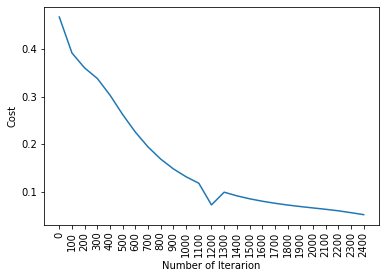

In [19]:
def two_layer_NN(x_train, y_train, x_test, y_test, epoch) : 
    cost_list = []
    index_list = []
    #initialize
    param = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(epoch) : 
        #forward propagation
        A2, cache = forward_propagation_NN(x_train, param)
        cost = compute_cost_NN(A2, y_train, param)
        #backward propagation
        grads = backward_propagation_NN(param, cache, x_train, y_train)
        #update
        param = update_parameters_NN(param, grads)
        
        if i % 100 == 0 :
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    #y_predict_test = predict_NN(param,x_test)
    #y_predict_train = predict_NN(param,x_train)
    
    #print("train accuracy: {} %".format(100 - np.mean(np.abs(y_predict_train - y_train)) * 100))
    #print("test accuracy: {} %".format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))
    
    return param

parameters = two_layer_NN(x_train, y_train,x_test,y_test, epoch=2500)

# L Layer Neural Network

* Increased hidden layers -> Detect more complex features 
* hyperparameters:
    - learning rate
    - epoch
    - \# of hidden layers
    - \# of hidden nodes
    - type of activation function
* In this tutorial 
    - 2 hidden layer with 8 and 4 nodes
    - activation function : ReLU -> ReLU -> sigmoid 
    

In [20]:
# reshaping 
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

### Implementing with Keras library

* units : output dimensions of nodes
* kernel_initializer: init weights
* activation: activation function
* input_dim: \# of pixels in each image
* optimizer: use adam optimizer
* loss : use the same cost function 
* metrics : accuracy
* cross_val_score: use cross validation
* epochs: \# of iteration

In [37]:
# evaluating the ANN 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential # init NN library
from tensorflow.keras.layers import Dense # build layer

def build_classifier():
    classifier = Sequential() #init 
    classifier.add(Dense(units = 8,
                         kernel_initializer = 'uniform',
                         activation = 'relu',
                         input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4,
                        kernel_initializer = 'uniform',
                        activation = 'relu'))
    classifier.add(Dense(units = 1,
                        kernel_initializer = 'uniform',
                        activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier,
                             epochs = 100)
accuracies = cross_val_score(estimator = classifier, 
                             X = x_train,
                             y = y_train,
                             cv = 3) # try for 3 times 
mean = accuracies.mean() 
variance = accuracies.std()
print('Accuracy mean: ' + str(mean))
print('Accuracy variance'+ str(variance))

Train on 232 samples
Epoch 1/100
232/232 [==============================] - 0s 2ms/sample - loss: 0.6937 - accuracy: 0.4569
Epoch 2/100
232/232 [==============================] - 0s 88us/sample - loss: 0.6931 - accuracy: 0.5259
Epoch 3/100
232/232 [==============================] - 0s 101us/sample - loss: 0.6929 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 93us/sample - loss: 0.6925 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 111us/sample - loss: 0.6921 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 107us/sample - loss: 0.6910 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 98us/sample - loss: 0.6892 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 123us/sample - loss: 0.6874 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 93us/sample - loss: 0.6853 - accuracy: 0.5431
Epoch 10/100
232/232 [==================